In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
#Zillow CA Data
zillow_ca_df=pd.read_csv("zillow_ca_homevalue.csv")
#Census CA Data
census_pd=pd.read_csv("census_data.csv")


In [3]:
combined_ca = pd.merge(census_pd, zillow_ca_df, on="Zipcode")
combined_ca["Avg_HomeValue"]= (combined_ca["2016-01"]+combined_ca["2016-02"]+combined_ca["2016-03"]+combined_ca["2016-04"]+
                              combined_ca["2016-05"]+combined_ca["2016-06"]+combined_ca["2016-07"]+combined_ca["2016-08"]+
                              combined_ca["2016-09"]+combined_ca["2016-10"]+combined_ca["2016-11"]+combined_ca["2016-12"])/12
combined_ca = combined_ca[["Zipcode","City","State","CountyName","Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate","average rent","Median Home Value","Number of House Build in year","Avg_HomeValue","Employment Rate"]]
combined_ca.head(10)
#csv
combined_ca.to_csv("Census_Zillow_Combined_CA.csv",index = False)


In [4]:
#Groupby County

combined_county = combined_ca.groupby("CountyName")
combined_county_city = combined_county ["City"].count()
combined_county_city

CountyName
Alameda             46
Amador               8
Butte               12
Calaveras            8
Contra Costa        33
El Dorado           16
Fresno              38
Glenn                2
Humboldt            10
Imperial             5
Inyo                 3
Kern                27
Kings                4
Lake                 7
Lassen               2
Los Angeles        266
Madera               9
Marin               16
Mariposa             3
Mendocino            6
Merced              10
Modoc                1
Mono                 3
Monterey            16
Napa                 7
Nevada               8
Orange              84
Placer              22
Plumas               5
Riverside           60
Sacramento          47
San Benito           3
San Bernardino      58
San Diego           87
San Francisco       24
San Joaquin         24
San Luis Obispo     18
San Mateo           25
Santa Barbara       18
Santa Clara         52
Santa Cruz          12
Shasta               8
Siskiyou             8


In [5]:
# create bin for age range added into combined data sheet
age_bins=[0,20,30,40,50,60,70]
age_group=["0-20","21-30","31-40","41-50","51-60","61-70"]
combined_ca["Age Range"] = pd.cut(combined_ca["Median Age"], age_bins, labels=age_group)
combined_ca.head(10)

,Zipcode,City,State,CountyName,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,average rent,Median Home Value,Number of House Build in year,Avg_HomeValue,Employment Rate,Age Range
0,90001,Florence-Graham,CA,Los Angeles,57942.0,28.0,34323.0,11294.0,18902.0,32.622277,915.0,272200.0,1950.0,2.999500e+05,44.482413,21-30
1,90002,Los Angeles,CA,Los Angeles,51826.0,27.5,32520.0,11212.0,18302.0,35.314321,902.0,248200.0,1951.0,2.946667e+05,40.938911,21-30
2,90003,Los Angeles,CA,Los Angeles,70208.0,28.0,31878.0,10611.0,24556.0,34.976071,958.0,268500.0,1951.0,3.002417e+05,42.456700,21-30
3,90004,Los Angeles,CA,Los Angeles,63095.0,35.5,43180.0,29194.0,12919.0,20.475473,1044.0,838000.0,1946.0,1.168492e+06,57.777954,31-40
4,90005,Los Angeles,CA,Los Angeles,39338.0,33.9,31485.0,20265.0,11520.0,29.284661,943.0,672600.0,1947.0,7.051917e+05,58.897249,31-40
5,90006,Los Angeles,CA,Los Angeles,61230.0,33.6,31993.0,14306.0,17456.0,28.508901,916.0,469200.0,1950.0,5.459500e+05,55.905602,31-40
6,90007,Los Angeles,CA,Los Angeles,41979.0,24.3,22485.0,11658.0,17605.0,41.937635,1000.0,421200.0,1955.0,5.202000e+05,45.208318,21-30
7,90008,Los Angeles,CA,Los Angeles,32060.0,43.7,36134.0,28316.0,6769.0,21.113537,940.0,507900.0,1953.0,6.471167e+05,50.333749,41-50
8,90011,Los Angeles,CA,Los Angeles,104762.0,28.2,31684.0,10103.0,40661.0,38.812737,888.0,294800.0,1944.0,3.203000e+05,44.343369,21-30
9,90012,Los Angeles,CA,Los Angeles,32543.0,35.8,32712.0,21989.0,7755.0,23.830010,1121.0,432700.0,1984.0,4.649500e+05,38.370771,31-40


In [6]:
#sort the data based on Media Home Value
combined_ca=combined_ca.sort_values(["Median Home Value"],ascending=False)
combined_ca=combined_ca.reset_index(drop=True)
combined_ca.head(20)
#get top 20 highest Home Value City
top_20_homevalue = combined_ca.head(10)
top_20_homevalue

,Zipcode,City,State,CountyName,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,average rent,Median Home Value,Number of House Build in year,Avg_HomeValue,Employment Rate,Age Range
0,94957,Ross,CA,Marin,1314.0,46.8,250001.0,122798.0,85.0,6.468798,2050.0,2000001.0,1943.0,3.078942e+06,42.009132,41-50
1,94027,Atherton,CA,San Mateo,7317.0,47.7,243542.0,144323.0,300.0,4.100041,2563.0,2000001.0,1957.0,5.552333e+06,40.330737,41-50
2,92657,Newport Coast,CA,Orange,9768.0,49.8,195051.0,117924.0,194.0,1.986077,2398.0,2000001.0,1998.0,2.571683e+06,54.043817,41-50
3,94920,Tiburon,CA,Marin,12725.0,50.2,155710.0,116117.0,463.0,3.638507,2300.0,2000001.0,1967.0,2.532100e+06,48.895874,51-60
4,94028,Portola Valley,CA,San Mateo,6830.0,53.1,229554.0,129377.0,172.0,2.518302,2979.0,2000001.0,1963.0,3.203908e+06,44.802343,51-60
5,92662,Newport Beach,CA,Orange,2863.0,57.2,97206.0,99838.0,104.0,3.632553,1958.0,2000001.0,1955.0,2.564192e+06,52.008383,51-60
6,90402,Santa Monica,CA,Los Angeles,11410.0,50.1,140612.0,115123.0,847.0,7.423313,1826.0,2000001.0,1956.0,3.452483e+06,50.867660,51-60
7,92067,Rancho Santa Fe,CA,San Diego,9127.0,50.3,133355.0,67233.0,966.0,10.583982,1579.0,2000001.0,1990.0,2.727625e+06,34.622548,51-60
8,94301,Palo Alto,CA,Santa Clara,17409.0,42.9,135427.0,93365.0,1276.0,7.329542,1948.0,2000001.0,1956.0,3.476100e+06,53.294273,41-50
9,94024,Los Altos,CA,Santa Clara,23057.0,46.3,204534.0,94996.0,718.0,3.114022,2444.0,2000001.0,1960.0,2.797450e+06,44.802012,41-50


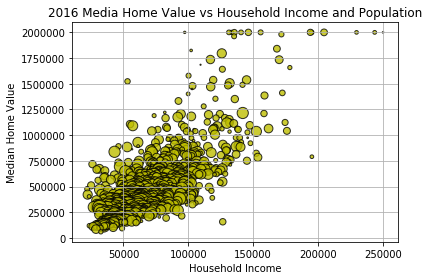

In [14]:
#Clean the non value data in Census "-6666666666"
combined_ca = combined_ca.loc[(combined_ca["Household Income"]>0)]
#scatter chart Home Value vs population and Household Income
plot_1 = combined_ca.plot(kind = "scatter",x = "Household Income",y = "Median Home Value",s= combined_ca["Population"]/500,
                           c = "y",grid = True, edgecolors="black",alpha =.8,linewidths =1,title = "2016 Media Home Value vs Household Income and Population" )
plt.tight_layout()
# save figure
plt.savefig("2016 Media Home Value vs Household Income and Population.png")
#show figure 
plt.show()

In [11]:
#Calculates a Pearson correlation coefficient and the p-value for testing non-correlation
pvalue = stats.pearsonr(combined_ca["Household Income"], combined_ca["Median Home Value"])[1]
print(f"P-value is {pvalue}, which shows there is correlation between household income and home value.")

P-value is 1.9569578295545415e-237, which shows there is correlation between household income and home value.


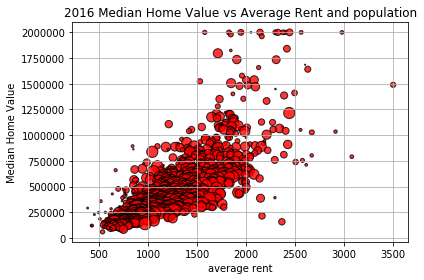

In [15]:
#Clean the non value data in Census "-6666666666"
combined_ca = combined_ca.loc[(combined_ca["average rent"]>0)]
#scatter chart Median Home Value vs Average Rent and population
plot_3 = combined_ca.plot(kind = "scatter",x = "average rent",y = "Median Home Value",s= combined_ca["Population"]/500,
                           c = "red",grid = True, edgecolors="black",alpha =.8,linewidths =1,
                          title = "2016 Median Home Value vs Average Rent and population" )
plt.tight_layout()
# save figure
plt.savefig("2016 Median Home Value vs Average Rent and population.png")
#show figure 
plt.show()

In [16]:
#Calculates a Pearson correlation coefficient and the p-value for testing non-correlation
pvalue = stats.pearsonr(combined_ca["average rent"], combined_ca["Median Home Value"])[1]
print(f"P-value is {pvalue}, which shows there is correlation between average rent and home value.")

P-value is 1.0531185015839029e-225, which shows there is correlation between average rent and home value.


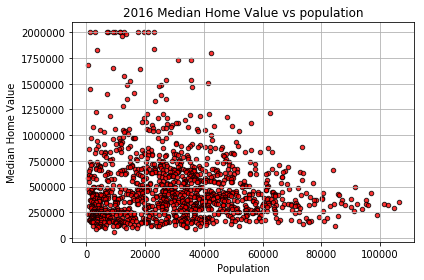

In [19]:
#scatter chart Median Home Value vs Average Rent and population
plot_4 = combined_ca.plot(kind = "scatter",x = "Population",y = "Median Home Value",
                           c = "red",grid = True, edgecolors="black",alpha =.8,linewidths =1,
                          title = "2016 Median Home Value vs population" )
plt.tight_layout()
# save figure
plt.savefig("2016 Median Home Value vs population.png")
#show figure 
plt.show()

In [20]:
#Calculates a Pearson correlation coefficient and the p-value for testing non-correlation
pvalue = stats.pearsonr(combined_ca["Population"], combined_ca["Median Home Value"])[1]
print(f"P-value is {pvalue}, which shows there is correlation between population and home value.")

P-value is 0.0006057986255214741, which shows there is correlation between population and home value.


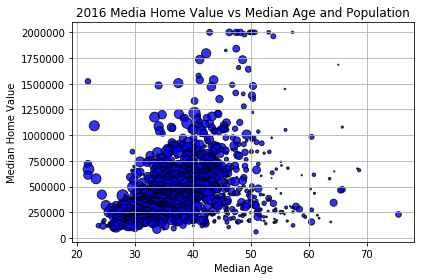

In [23]:
#scatter chart Home Value vs age 
plot_5 = combined_ca.plot(kind = "scatter",x = "Median Age",y = "Median Home Value",s= combined_ca["Population"]/500,
                           c = "blue",grid = True, edgecolors="black",alpha =.8,linewidths =1,
                          title = "2016 Media Home Value vs Median Age and Population" )
plt.tight_layout()
# save figure
plt.savefig("2016 Media Home Value vs Median Age and Population.png")
#show figure 
plt.show()

In [24]:
#Calculates a Pearson correlation coefficient and the p-value for testing non-correlation
pvalue = stats.pearsonr(combined_ca["Median Age"], combined_ca["Median Home Value"])[1]
print(f"P-value is {pvalue}, which shows there is correlation between age and home value.")

P-value is 1.8119773237169143e-34, which shows there is correlation between age and home value.


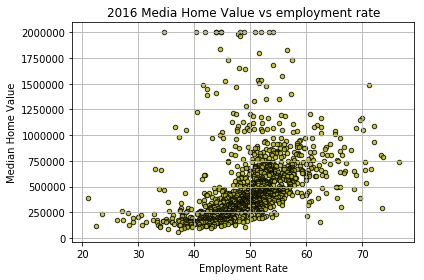

In [25]:
#Clean the non value data in Census "-6666666666"
combined_ca = combined_ca.loc[(combined_ca["Household Income"]>0)]
#scatter chart Home Value vs population and Household Income
plot_6 = combined_ca.plot(kind = "scatter",x = "Employment Rate",y = "Median Home Value",
                           c = "y",grid = True, edgecolors="black",alpha =.8,linewidths =1,title = "2016 Media Home Value vs employment rate" )
plt.tight_layout()
# save figure
plt.savefig("2016 Media Home Value vs employment rate.png")
#show figure 
plt.show()

In [26]:
#Calculates a Pearson correlation coefficient and the p-value for testing non-correlation
pvalue = stats.pearsonr(combined_ca["Employment Rate"], combined_ca["Median Home Value"])[1]
print(f"P-value is {pvalue}, which shows there is correlation between Employment Rate and home value.")

P-value is 2.1184263274346533e-49, which shows there is correlation between Employment Rate and home value.


In [27]:
#group by age range, then get the average home value and household income for each age range
combined_ca_group=combined_ca.groupby(["Age Range"])
avg_home_value = combined_ca_group["Median Home Value"].mean()
avg_household_income = combined_ca_group["Household Income"].mean()
avg_capita_income = combined_ca_group["Per Capita Income"].mean()
combined_ca_group =pd.DataFrame({"Avg Home Value":avg_home_value, "Avg Household Income":avg_household_income})
#Drop null values
combined_ca_group = combined_ca_group.dropna(how="any").round(2)
combined_ca_group=combined_ca_group.reset_index()
combined_ca_group

,Age Range,Avg Home Value,Avg Household Income
0,21-30,262837.61,42103.26
1,31-40,427242.06,66137.62
2,41-50,647231.08,86843.57
3,51-60,611138.44,73742.23
4,61-70,561138.89,67831.72


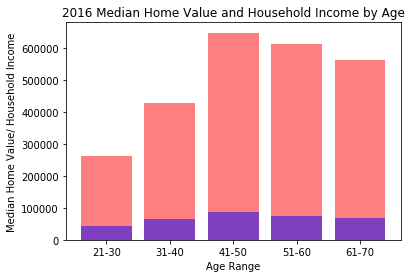

In [31]:
#Plot bar chart by grouped data frame
# Set x axis and tick locations
x_axis = np.arange(len(combined_ca_group))
tick_locations = [value for value in x_axis]
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.bar(x_axis, combined_ca_group["Avg Home Value"], color='r', alpha=0.5, align="center")
plt.bar(x_axis, combined_ca_group["Avg Household Income"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, combined_ca_group["Age Range"])
plt.title("2016 Median Home Value and Household Income by Age")
plt.xlabel("Age Range")
plt.ylabel("Median Home Value/ Household Income")
# Save an image of the chart and print it to the screen
plt.savefig("2016 Median Home Value by Age (Bar Chart).png")
plt.show()

In [33]:
# create bin for household Income added into combined data sheet
Income_bins=[20000,50000,80000,110000,140000,170000,210000,250001]
Income_group=["20k-50k","50k-80k","80k-110k","110k-140k","140k-170k","170k-210k","210k-250k"]
combined_ca["Income Range"] = pd.cut(combined_ca["Household Income"], Income_bins, labels=Income_group)
combined_ca.head(10)

,Zipcode,City,State,CountyName,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,average rent,Median Home Value,Number of House Build in year,Avg_HomeValue,Employment Rate,Age Range,Income Range
0,94957,Ross,CA,Marin,1314.0,46.8,250001.0,122798.0,85.0,6.468798,2050.0,2000001.0,1943.0,3.078942e+06,42.009132,41-50,210k-250k
1,94027,Atherton,CA,San Mateo,7317.0,47.7,243542.0,144323.0,300.0,4.100041,2563.0,2000001.0,1957.0,5.552333e+06,40.330737,41-50,210k-250k
2,92657,Newport Coast,CA,Orange,9768.0,49.8,195051.0,117924.0,194.0,1.986077,2398.0,2000001.0,1998.0,2.571683e+06,54.043817,41-50,170k-210k
3,94920,Tiburon,CA,Marin,12725.0,50.2,155710.0,116117.0,463.0,3.638507,2300.0,2000001.0,1967.0,2.532100e+06,48.895874,51-60,140k-170k
4,94028,Portola Valley,CA,San Mateo,6830.0,53.1,229554.0,129377.0,172.0,2.518302,2979.0,2000001.0,1963.0,3.203908e+06,44.802343,51-60,210k-250k
5,92662,Newport Beach,CA,Orange,2863.0,57.2,97206.0,99838.0,104.0,3.632553,1958.0,2000001.0,1955.0,2.564192e+06,52.008383,51-60,80k-110k
6,90402,Santa Monica,CA,Los Angeles,11410.0,50.1,140612.0,115123.0,847.0,7.423313,1826.0,2000001.0,1956.0,3.452483e+06,50.867660,51-60,140k-170k
7,92067,Rancho Santa Fe,CA,San Diego,9127.0,50.3,133355.0,67233.0,966.0,10.583982,1579.0,2000001.0,1990.0,2.727625e+06,34.622548,51-60,110k-140k
8,94301,Palo Alto,CA,Santa Clara,17409.0,42.9,135427.0,93365.0,1276.0,7.329542,1948.0,2000001.0,1956.0,3.476100e+06,53.294273,41-50,110k-140k
9,94024,Los Altos,CA,Santa Clara,23057.0,46.3,204534.0,94996.0,718.0,3.114022,2444.0,2000001.0,1960.0,2.797450e+06,44.802012,41-50,170k-210k


In [36]:
#group by Income range, then get the average home value for each Income range
combined_ca_income=combined_ca.groupby(["Income Range"])
avg_home_value_income = combined_ca_income["Median Home Value"].mean()
combined_ca_income =pd.DataFrame({"Avg Home Value":avg_home_value_income})
#Drop null values
combined_ca_income = combined_ca_income.dropna(how="any").round(2)
combined_ca_income =combined_ca_income.reset_index()
combined_ca_income

,Income Range,Avg Home Value
0,20k-50k,258219.44
1,50k-80k,417920.23
2,80k-110k,657880.60
3,110k-140k,975456.29
4,140k-170k,1271881.10
5,170k-210k,1556089.22
6,210k-250k,2000001.00


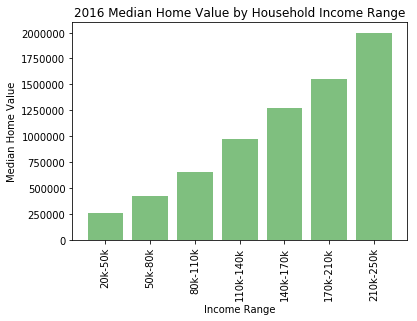

In [38]:
#Plot bar chart by income grouped data frame
# Set x axis and tick locations
x_axis = np.arange(len(combined_ca_income))
tick_locations = [value for value in x_axis]
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.bar(x_axis, combined_ca_income["Avg Home Value"], color='green', alpha=0.5, align="center")
plt.xticks(tick_locations, combined_ca_income["Income Range"],rotation="vertical")
plt.title("2016 Median Home Value by Household Income Range")
plt.xlabel("Income Range")
plt.ylabel("Median Home Value")
# Save an image of the chart and print it to the screen
plt.savefig("2016 Median Home Value by Income (Bar Chart).png")
plt.show()